ANALYSIS:

1) There are fewer drivers in the Suburban (16.5% of total drivers) and Rural (2.6% of total drivers ) areas. However, they earn a larger share of the total fares (30.5% of all fares for Suburban drivers and 6.8% of all fares for Rural drivers)

2) Rural drivers tend to give fewer rides, but the rides they do give are more expensive than their urban counterparts.

3) There are far more Urban drivers in total, Urban drivers give many more rides on average, and their fares are less expensive than their Suburban and Rural counterparts.  

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset

city_ride_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

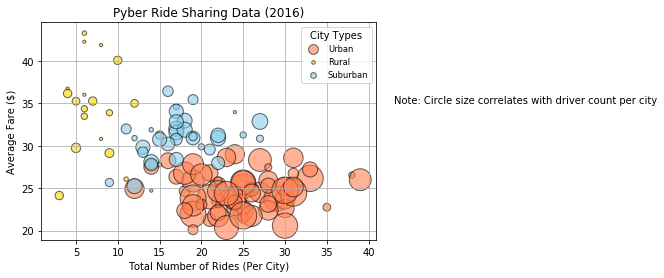

In [2]:
# Obtain the x and y coordinates for each of the three city types

#urban
urban_data = city_ride_data.loc[city_ride_data["type"] == "Urban"]
urban_data.head()

avg_fare_city_urban = urban_data.groupby(["type", "city"]).mean()
total_rides_city_urban = urban_data.groupby(["type", "city"]).count()
total_driver_city_urban = urban_data.groupby(["type", "city"]).mean()

avg_fare_city_urban.head()

#rural
rural_data = city_ride_data.loc[city_ride_data["type"] == "Rural"]
rural_data.head()

avg_fare_city_rural = rural_data.groupby(["type", "city"]).mean()
total_rides_city_rural = rural_data.groupby(["type", "city"]).count()
total_driver_city_rural = rural_data.groupby(["type", "city"]).mean()

# #suburban
suburban_data = city_ride_data.loc[city_ride_data["type"] == "Suburban"]
suburban_data.head()

avg_fare_city_suburban = suburban_data.groupby(["type", "city"]).mean()
total_rides_city_suburban = suburban_data.groupby(["type", "city"]).count()
total_driver_city_suburban = suburban_data.groupby(["type", "city"]).mean()

# # # Build the scatter plots for each city types
scatter_plot_urban = plt.scatter(total_rides_city_urban["ride_id"], avg_fare_city_urban["fare"], 
                                 s=(total_driver_city_urban["driver_count"])*10, facecolors="coral", edgecolors="black", alpha=.6, label="Urban")

scatter_plot_rural = plt.scatter(total_rides_city_rural["ride_id"], avg_fare_city_rural["fare"], 
                                 s=(total_driver_city_rural["driver_count"])*10, facecolors="gold", edgecolors="black", alpha=.6, label="Rural")

scatter_plot_suburban = plt.scatter(total_rides_city_suburban["ride_id"], avg_fare_city_suburban["fare"], 
                                 s=(total_driver_city_suburban["driver_count"])*10, facecolors="skyblue", edgecolors="black", alpha=.6, label="Suburban")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(loc="upper right", title="City Types", fontsize="small", markerscale=.5)

# Incorporate a text label regarding circle size
plt.text(43,35, "Note: Circle size correlates with driver count per city")


# Save Figure
plt.savefig("Images/PyberRideSharingData.png")

plt.show()



## Total Fares by City Type

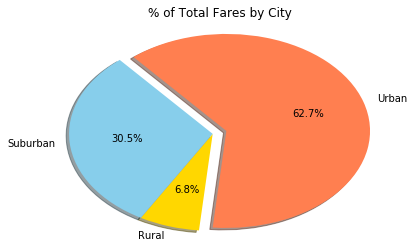

In [13]:
# Get total fares by city

total_rural_fares = rural_data["fare"].sum()
total_urban_fares = urban_data["fare"].sum()
total_suburban_fares = suburban_data["fare"].sum()

# Build Pie Chart
total_fares_df = [total_rural_fares, total_urban_fares, total_suburban_fares]
labels = ["Rural", "Urban", "Suburban"]
explode = (0,.1,0)
colors = ("gold", "coral", "skyblue")
plt.pie(total_fares_df, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=2400, shadow=True)
plt.title("% of Total Fares by City")
plt.axis("auto")

# Save Figure
plt.savefig("Images/TotalFaresbyCity.png")
plt.show()




## Total Rides by City Type

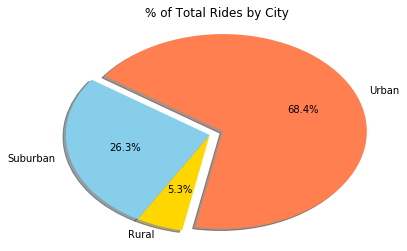

In [12]:
#Get total rides by city type
total_rural_rides = rural_data["ride_id"].count()
total_urban_rides = urban_data["ride_id"].count()
total_suburban_rides = suburban_data["ride_id"].count()

# Build Pie Chart
total_rides_df = [total_rural_rides, total_urban_rides, total_suburban_rides]
labels = ["Rural", "Urban", "Suburban"]
explode = (0,.1,0)
colors = ("gold", "coral", "skyblue")
plt.pie(total_rides_df, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=240, shadow=True)
plt.title("% of Total Rides by City")
plt.axis("auto")

# Save Figure
plt.savefig("Images/TotalRidesbyCity.png")
plt.show()



## Total Drivers by City Type

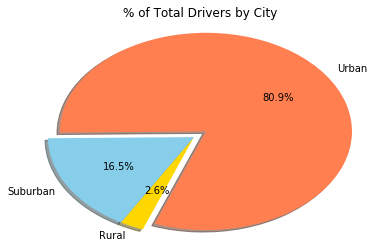

In [11]:
#Get total rides by city type
total_drivers = city_data.groupby(["type"]).sum()
rural_drivers = total_drivers.loc["Rural"]
urban_drivers = total_drivers.loc["Urban"]
suburban_drivers = total_drivers.loc["Suburban"]



# Build Pie Chart
total_rides_df = [rural_drivers, urban_drivers, suburban_drivers]
labels = ["Rural", "Urban", "Suburban"]
explode = (0,.1,0)
colors = ("gold", "coral", "skyblue")
plt.pie(total_rides_df, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=240, shadow=True)
plt.title("% of Total Drivers by City")
plt.axis("auto")

# Save Figure
plt.savefig("Images/TotalDriversbyCity.png")

plt.show()


